# Calculate different performance metrics

In [1]:
import tensorflow as tf
from utils import bbox_utils, data_utils, drawing_utils, io_utils, train_utils, eval_utils
from models.decoder import get_decoder_model
from helper import label_generator
from models.ssd_mobilenet_v2 import get_model, init_model
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
batch_size = 8
evaluate = False
backbone = 'mobilenet_v2'

hyper_params = train_utils.get_hyper_params(backbone)
test_data, size_info = data_utils.get_dataset("test", dir_ = "F:\Minor Data Collection\Final Image Data\Monument Original\TFRecord\\")
total_items = size_info

In [3]:
labels = label_generator.csv_to_label_map("helper\Report\ps-up-sp-BDS-alamy-merged.csv", 'list-type')
labels = ["bg"] + labels
hyper_params["total_labels"] = len(labels)
img_size = hyper_params["img_size"]

data_types = data_utils.get_data_types()
data_shapes = data_utils.get_data_shapes()
padding_values = data_utils.get_padding_values()

test_data = test_data.map(lambda x : data_utils.preprocessing(x, img_size, img_size))
test_data = test_data.padded_batch(batch_size, padded_shapes=data_shapes, padding_values=padding_values)

In [4]:
from models import header
ssd_mobilenet_model = tf.keras.models.load_model("MobileNetV2_SSD_SavedModel", custom_objects={
    "HeadWrapper": header.HeadWrapper
})

In [5]:
step_size = train_utils.get_step_size(total_items, batch_size)
pred_bboxes, pred_labels, pred_scores = ssd_mobilenet_model.predict(test_data, steps=step_size, verbose=1)

45/45 [==============================] - 36s 714ms/step


In [7]:
print(pred_bboxes.shape)

(357, 200, 4)


In [22]:
test_data, size_info = data_utils.get_dataset("test", dir_ = "F:\Minor Data Collection\Final Image Data\Monument Original\TFRecord\\")
test_data = test_data.map(lambda x : data_utils.preprocessing(x, img_size, img_size))

In [70]:
pred_bboxes[0]

array([[0.31059664, 0.6170441 , 0.6677995 , 0.82603306],
       [0.3619535 , 0.21808775, 0.7482805 , 0.6547702 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

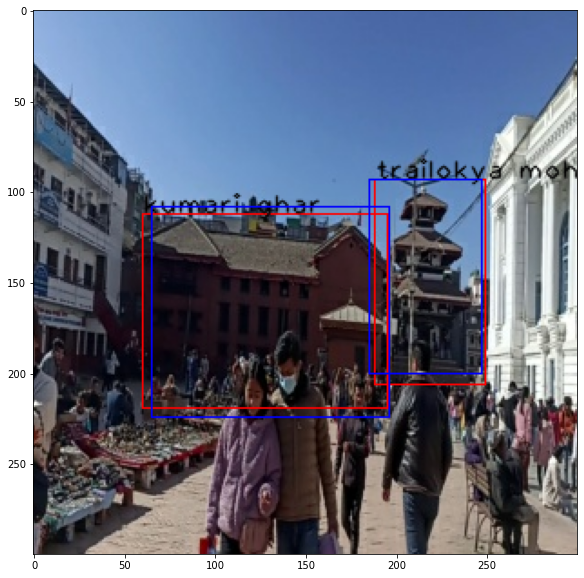

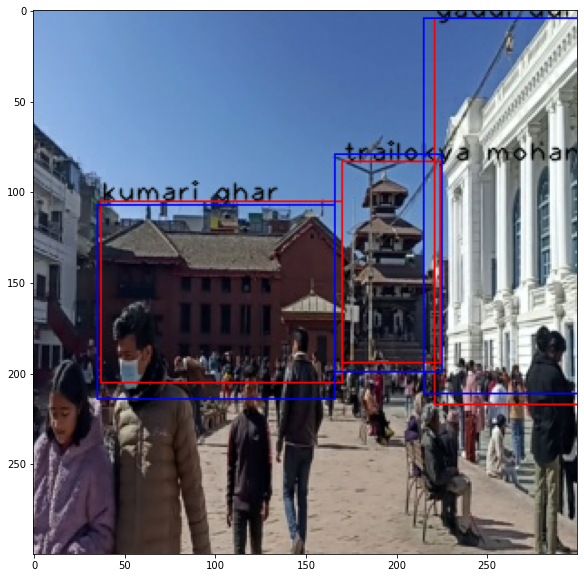

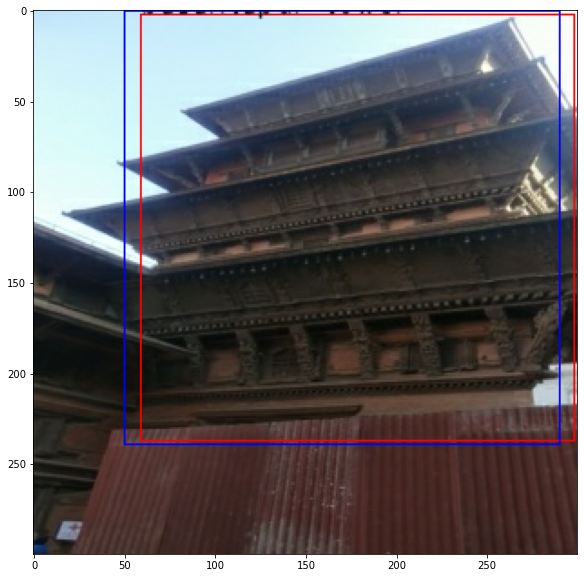

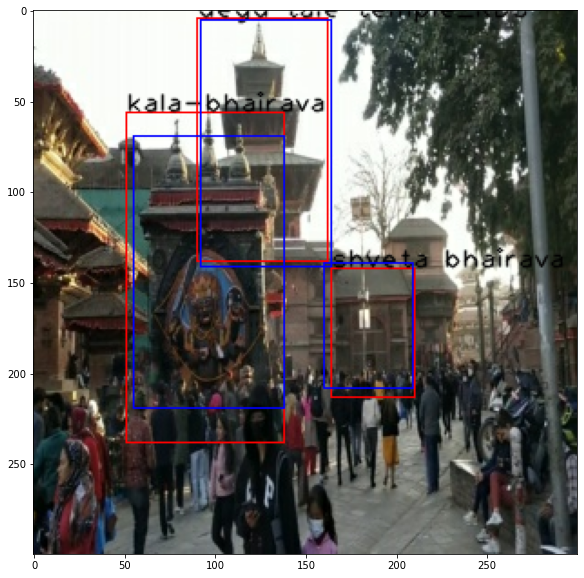

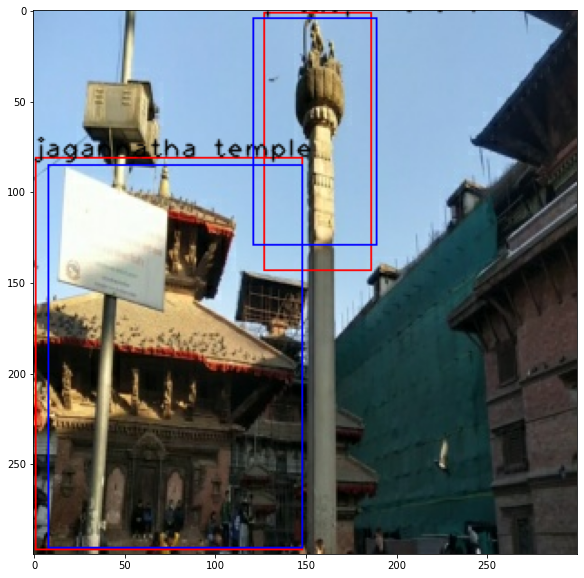

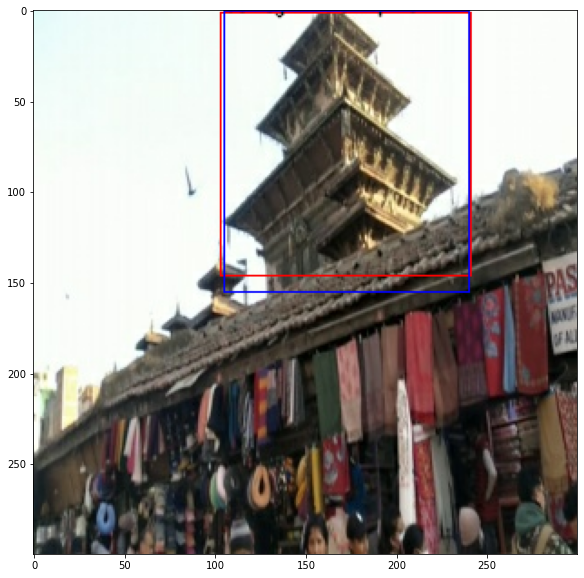

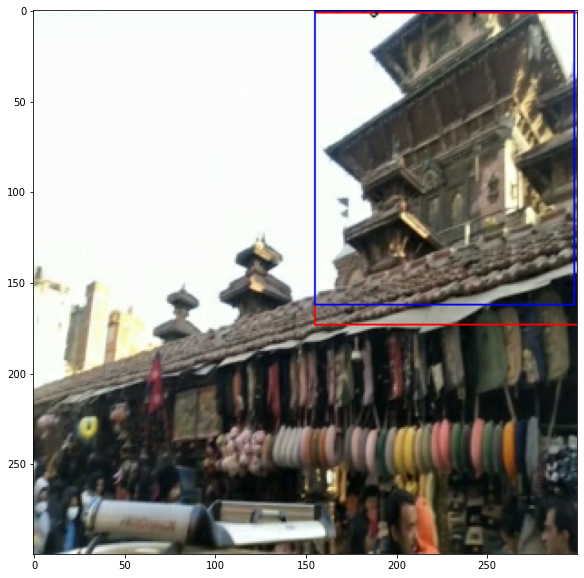

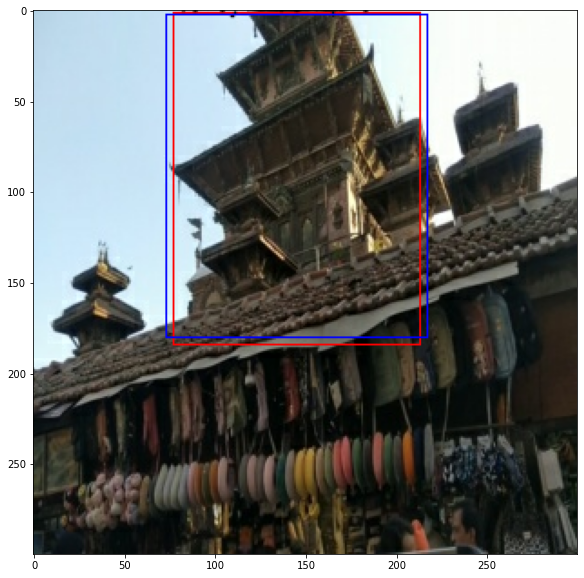

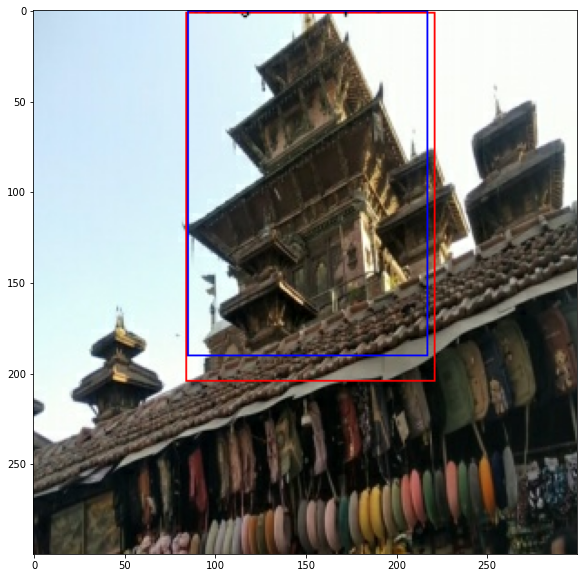

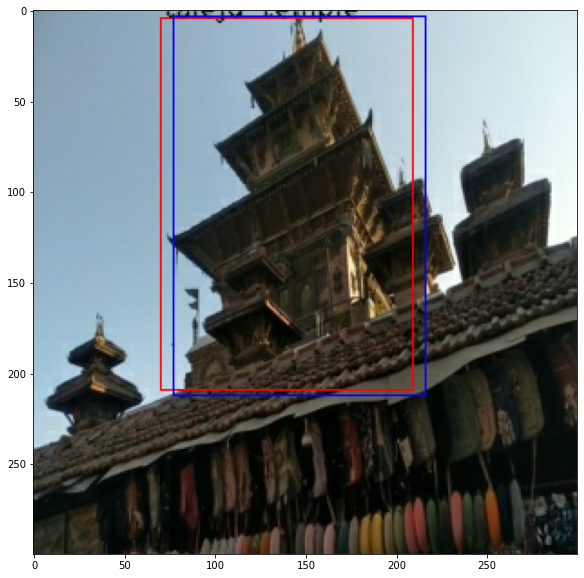

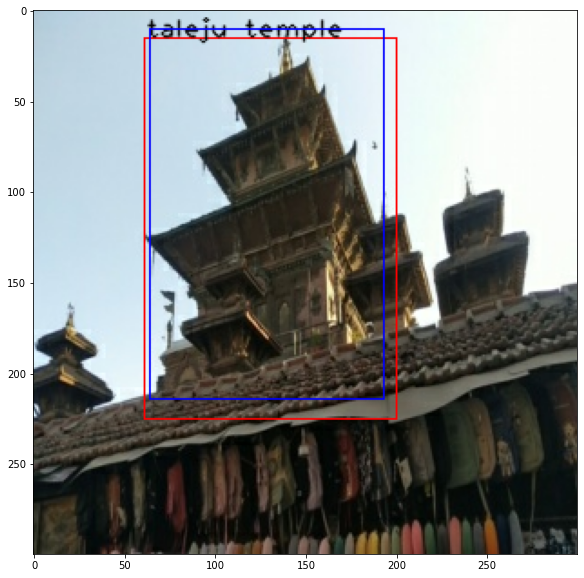

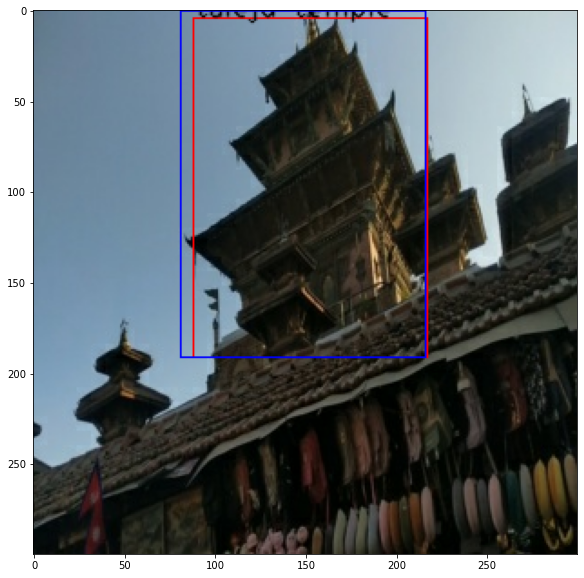

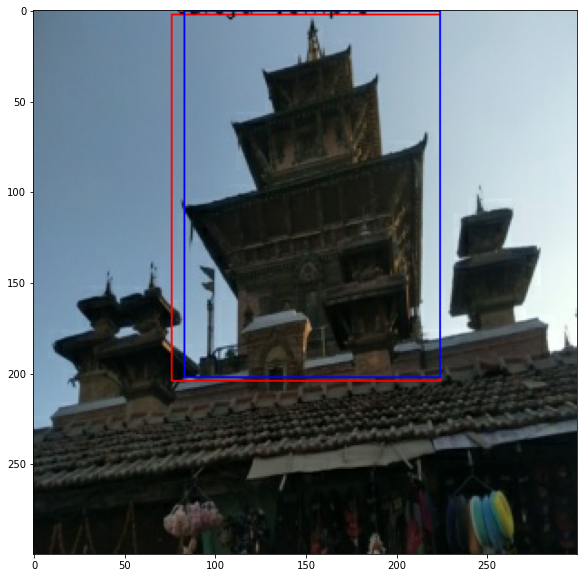

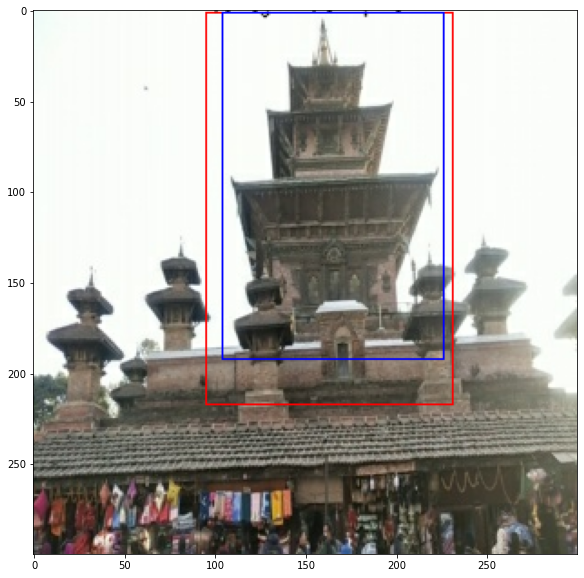

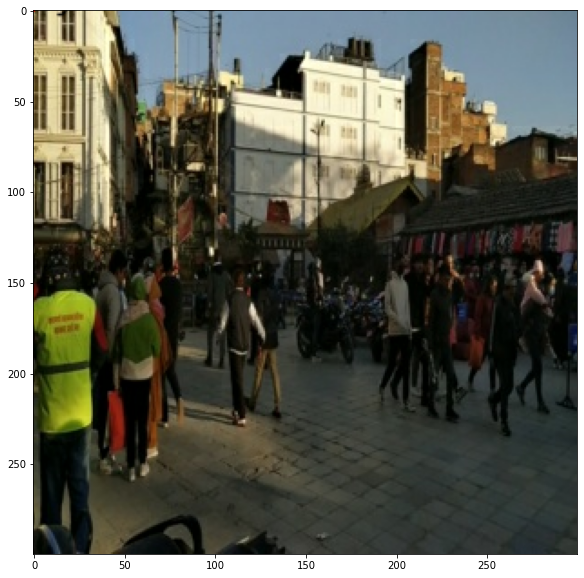

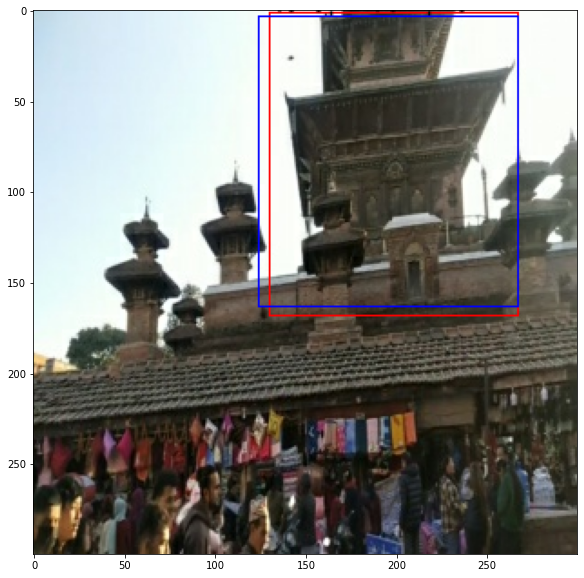

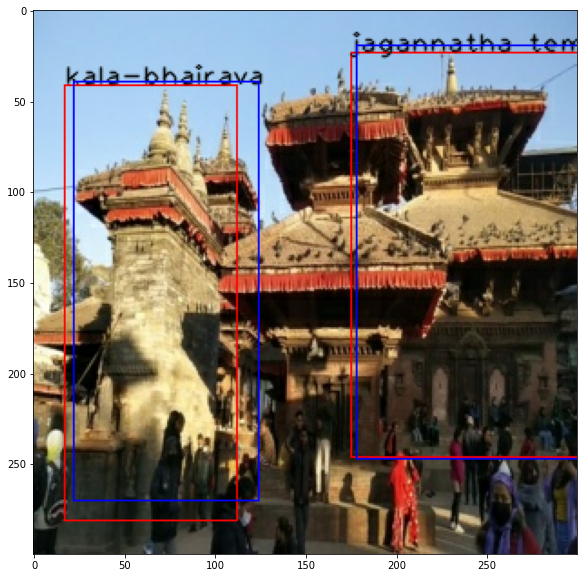

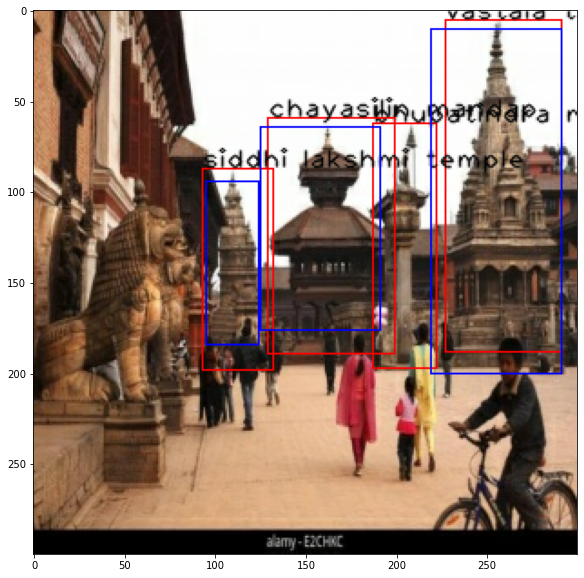

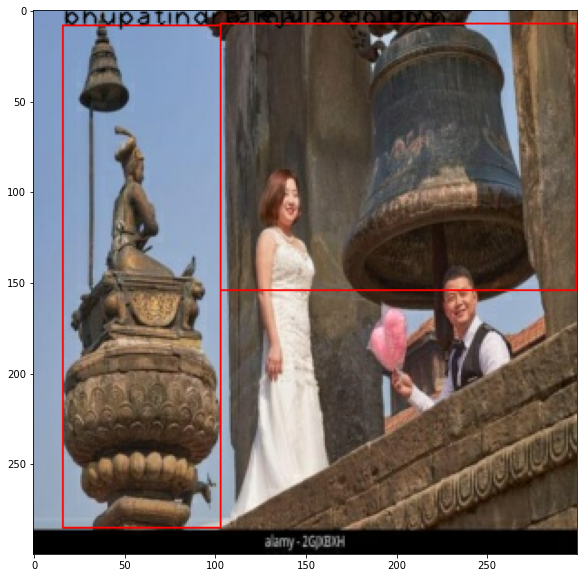

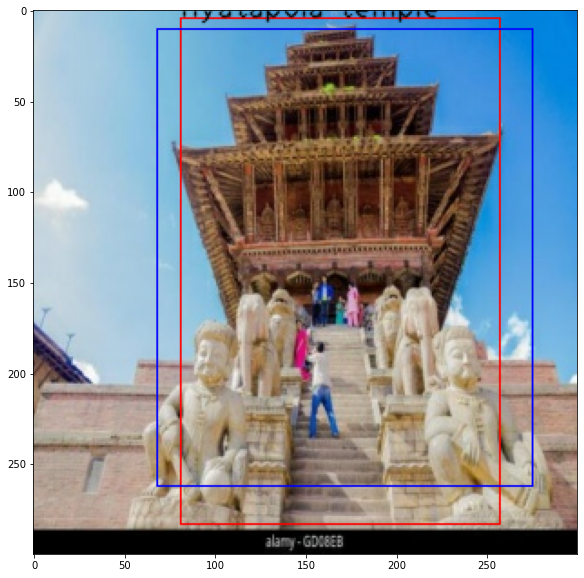

In [86]:
outer_count = 0
for index, ele in enumerate(test_data):
    #loading an image
    img_array = np.uint8(ele[0].numpy() * 255)
    
    bounding_boxes = ele[1].numpy()
    class_labels = ele[2].numpy()
    
    for count, bbox in enumerate(bounding_boxes):
        y1 = int(bbox[0] * 300)
        x1 = int(bbox[1] * 300)
        y2 = int(bbox[2] * 300)
        x2 = int(bbox[3] * 300)
        cv2.rectangle(img_array, (x1, y1), (x2, y2), (255, 0, 0), thickness = 1)
        cv2.putText(img_array, str(labels[class_labels[count]]), (x1, y1), 1, 1, (0, 0, 0), 1, cv2.LINE_AA)
    
    pred_class_labels = pred_labels[index]
    
    for count, bbox in enumerate(pred_bboxes[index]):
        if bbox[0] > 0 or bbox[1] > 0:
            y1 = int(bbox[0] * 300)
            x1 = int(bbox[1] * 300)
            y2 = int(bbox[2] * 300)
            x2 = int(bbox[3] * 300)
            cv2.rectangle(img_array, (x1, y1), (x2, y2), (0, 0, 255), thickness = 1)
#             cv2.putText(img_array, str(labels[pred_cl[count]]), (x1, y1), 1, 0, (255, 255, 0), 1, cv2.LINE_AA)
        else:
            break
    
    plt.figure(figsize = (10, 10))
    plt.imshow(img_array)
    outer_count += 1
    if outer_count == 20:
        break